In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_pickle("./Data/filteredData.pkl")
df.head()

,PM25,PM10,CO,NO2,O3,NH3,SO2,TEMPRATURE,ALTITUDE,HUMIDITY,AQI,Year,Month,Day,Hour,Weekday
dt,,,,,,,,,,,,,,,,
2020-01-12 00:00:00,198.64,544.83,2.12,10.60,2.49,20.30,1.87,13.67,185,65,363.22,2020,1,12,0,6
2020-01-12 00:15:00,197.78,526.72,2.25,10.92,2.47,20.33,2.81,13.63,187,59,351.15,2020,1,12,0,6
2020-01-12 00:30:00,192.20,409.04,2.22,11.50,2.42,20.22,2.52,13.40,188,64,272.69,2020,1,12,0,6
2020-01-12 00:45:00,192.20,409.04,2.06,11.08,2.33,20.76,2.41,13.44,195,64,272.69,2020,1,12,0,6
2020-01-12 01:00:00,192.20,409.04,1.93,10.43,2.29,19.59,2.40,13.51,190,60,272.69,2020,1,12,1,6


In [3]:
df.values

array([[198.64, 544.83,   2.12, ...,  12.  ,   0.  ,   6.  ],
       [197.78, 526.72,   2.25, ...,  12.  ,   0.  ,   6.  ],
       [192.2 , 409.04,   2.22, ...,  12.  ,   0.  ,   6.  ],
       ...,
       [  9.65, 125.77,   0.87, ...,  14.  ,  12.  ,   0.  ],
       [  9.62, 128.72,   0.86, ...,  14.  ,  12.  ,   0.  ],
       [  9.24, 159.03,   0.81, ...,  14.  ,  12.  ,   0.  ]])

In [4]:
X=df.drop("AQI",axis=1)
Y=df["AQI"]
n=df.shape[0]
n=int (n*0.65)
train_x=X[:n-1]
test_x=X[n-1:-1]
train_y=Y[1:n]
test_y=Y[n:]
train_y=train_y.astype(int)
test_y=test_y.astype(int)

### Logistic Regression

In [5]:
model=LogisticRegression()
model.fit(train_x,train_y)
p=model.predict(test_x)
acc_log= round(model.score(train_x,train_y) * 100, 2)
acc_logP= round(model.score(test_x,test_y) * 100, 2)
p

C:\Users\Sahil Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([474, 474, 388, 530, 530, 530, 530, 435, 435, 435, 435, 434, 434,
       434, 434, 359, 359, 359, 359, 359, 359, 359, 359, 368, 368, 368,
       326, 326, 326, 326, 282, 219, 219, 219, 219, 196, 196, 196, 196,
       196, 196, 196, 196, 196, 196, 196, 196, 156, 156, 156, 156, 156,
       156, 156, 156, 190, 190, 190, 190, 226, 226, 226, 226, 226, 226,
       226, 226, 124, 124, 124, 124, 114, 114, 114, 114, 114, 114, 114,
       114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 118,
       281, 344, 344, 344, 344, 344, 344, 344, 344, 344, 393, 393, 305,
       305, 305, 393, 393, 393, 393, 393, 273, 273, 273, 273, 226, 226,
       220, 220, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190,
       190, 156, 156, 156, 156, 190, 190, 196, 196, 196, 156, 196, 156,
       132, 132, 132, 132, 156, 156, 156, 156, 190, 190, 190, 209, 404,
       404, 393, 393, 307, 257, 307, 257, 209, 208, 209, 209, 194, 194,
       194, 208, 226, 226, 226, 226, 226, 226, 226, 226, 176, 17

### KNN

In [6]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train_x,train_y)  
Y_pred = knn.predict(test_x)  
acc_knn = round(knn.score(train_x,train_y) * 100, 2)  
acc_knnP = round(knn.score(test_x,test_y) * 100, 2)
Y_pred

array([412, 380, 388, 530, 530, 444, 530, 476, 476, 476, 441, 444, 444,
       444, 444, 278, 278, 278, 278, 393, 278, 393, 278, 333, 333, 333,
       333, 286, 286, 286, 255, 177, 177, 182, 177, 177, 177, 177, 177,
       176, 176, 156, 176, 176, 176, 176, 156, 152, 147, 147, 152, 155,
       155, 155, 155, 177, 177, 177, 177, 237, 237, 237, 237, 237, 220,
       270, 216, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114,
       114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 119,
       229, 229, 229, 229, 344, 344, 344, 344, 344, 344, 381, 381, 303,
       303, 303, 317, 321, 321, 321, 355, 305, 305, 305, 305, 282, 229,
       237, 237, 206, 206, 206, 206, 206, 206, 206, 206, 182, 182, 182,
       182, 156, 156, 156, 156, 132, 132, 176, 132, 156, 156, 156, 157,
       132, 132, 132, 132, 155, 155, 155, 155, 200, 200, 200, 190, 257,
       355, 355, 257, 289, 289, 289, 289, 216, 216, 216, 216, 194, 194,
       194, 194, 270, 270, 193, 243, 209, 209, 209, 243, 166, 16

### Random Forest

In [7]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x,train_y)

Y_prediction = random_forest.predict(test_x)

acc_random_forest = round(random_forest.score(train_x,train_y) * 100, 2)
acc_random_forestP = round(random_forest.score(test_x,test_y) * 100, 2)
Y_prediction

array([423, 423, 423, 423, 423, 474, 476, 278, 278, 278, 474, 423, 476,
       476, 368, 476, 476, 476, 476, 321, 321, 359, 359, 368, 368, 317,
       368, 317, 255, 242, 359, 242, 242, 242, 242, 181, 181, 182, 181,
       181, 186, 186, 186, 181, 186, 181, 186, 186, 186, 186, 186, 186,
       186, 186, 186, 186, 186, 186, 186, 296, 243, 296, 238, 227, 186,
       119, 186, 127, 189, 189, 189, 189, 189, 119, 189, 189, 119, 119,
       173, 189, 189, 189, 189, 189, 189, 119, 119, 119, 119, 135, 296,
       322, 296, 296, 296, 307, 307, 307, 423, 359, 393, 423, 423, 423,
       423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 273, 273,
       242, 242, 226, 296, 296, 122, 192, 122, 192, 192, 132, 192, 178,
       178, 122, 122, 122, 122, 122, 122, 122, 122, 152, 122, 152, 122,
       152, 132, 147, 147, 147, 147, 147, 147, 147, 216, 296, 216, 434,
       457, 434, 289, 289, 243, 289, 296, 216, 216, 227, 209, 192, 192,
       192, 201, 255, 296, 255, 243, 255, 255, 255, 119, 119, 11

### Decision Tree

In [8]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_x,train_y)  
Y_pred2 = decision_tree.predict(test_x)  
acc_decision_tree = round(decision_tree.score(train_x,train_y) * 100, 2)  
acc_decision_treeP = round(decision_tree.score(test_x,test_y) * 100, 2)
Y_pred2

array([307, 476, 307, 477, 477, 474, 474, 351, 351, 351, 351, 477, 477,
       477, 477, 477, 477, 477, 477, 477, 477, 326, 326, 326, 326, 334,
       334, 334, 334, 334, 334, 264, 264, 242, 237, 178, 178, 290, 290,
       179, 290, 179, 290, 184, 172, 179, 172, 122, 132, 132, 132, 132,
       122, 132, 132, 186, 186, 186, 322, 264, 368, 264, 264, 219, 219,
       219, 222, 145, 145, 105, 105, 105, 105, 112, 112, 189, 189, 131,
       131, 131, 131, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124,
       119, 273, 273, 273, 467, 467, 467, 467, 467, 467, 467, 296, 476,
       476, 296, 296, 296, 296, 296, 296, 474, 474, 474, 468, 273, 273,
       264, 264, 196, 196, 196, 196, 216, 216, 196, 196, 186, 186, 186,
       183, 132, 132, 132, 132, 179, 290, 177, 132, 177, 177, 290, 122,
       132, 132, 132, 132, 132, 132, 132, 122, 216, 200, 196, 192, 434,
       368, 467, 467, 467, 427, 427, 119, 217, 188, 188, 188, 196, 216,
       196, 226, 119, 119, 119, 119, 119, 119, 119, 119, 183, 18

### 'Support Vector Machines

In [9]:
linear_svc = LinearSVC()
linear_svc.fit(train_x,train_y)

Y_pred3 = linear_svc.predict(test_x)

acc_linear_svc = round(linear_svc.score(train_x,train_y) * 100, 2)
acc_linear_svcP = round(linear_svc.score(test_x,test_y) * 100, 2)
Y_pred3

C:\Users\Sahil Kumar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393,
       393, 393, 393, 393, 393, 393, 393, 393, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 393, 209, 209, 209, 209,
       209, 209, 393, 209, 393, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 20

### RESULT

In [10]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Train_Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest,acc_decision_tree],
    'Test_Score': [acc_linear_svcP, acc_knnP, acc_logP, 
              acc_random_forestP,acc_decision_treeP]})
result_df = results.sort_values(by='Test_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train_Score,Test_Score
Model,,
KNN,57.65,2.86
Random Forest,100.00,1.54
Decision Tree,100.00,0.66
Logistic Regression,19.45,0.22
Support Vector Machines,2.73,0.00


### Evaluation

In [11]:
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import mean_squared_error,r2_score

In [12]:
# Support Vector Machines

#plot_confusion_matrix(linear_svc,test_x,test_y)

In [13]:
# KNN

#plot_confusion_matrix(knn,test_x,test_y)

In [15]:
rmse = np.sqrt(mean_squared_error(p, test_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 31.657


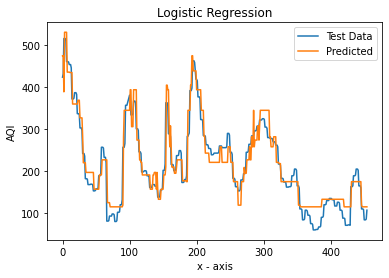

In [16]:
# Logistic Regression  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), p,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Logistic Regression')
plt.legend()
plt.show() 

In [17]:
rmse1 = np.sqrt(mean_squared_error(Y_pred, test_y))
print('Test RMSE: %.3f' % rmse1)

Test RMSE: 34.992


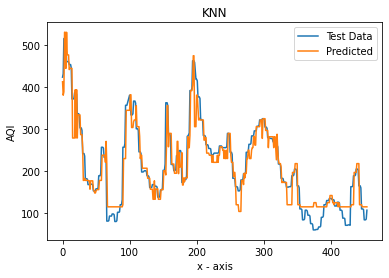

In [18]:
# KNN  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('KNN')
plt.legend()
plt.show() 

In [19]:
rmse2 = np.sqrt(mean_squared_error(Y_pred3, test_y))
print('Test RMSE: %.3f' % rmse2)

Test RMSE: 77.950


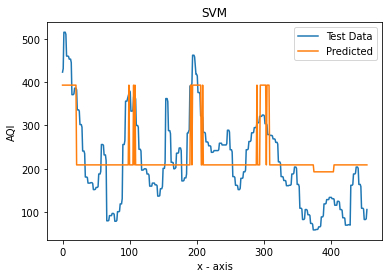

In [20]:
# SVM  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred3,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('SVM')
plt.legend()
plt.show() 

In [21]:
rmse3 = np.sqrt(mean_squared_error(Y_pred2, test_y))
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 60.922


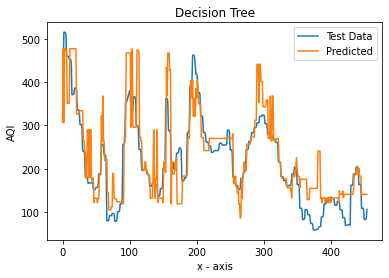

In [22]:
# Dession Tree  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred2,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Decision Tree')
plt.legend()
plt.show() 

In [23]:
rmse4 = np.sqrt(mean_squared_error(Y_prediction, test_y))
print('Test RMSE: %.3f' % rmse4)

Test RMSE: 64.472


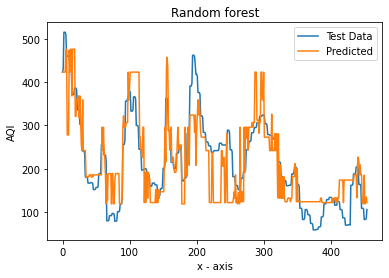

In [24]:
# Random Forest 
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_prediction,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Random forest')
plt.legend()
plt.show() 

In [ ]:
# Serialize mlp_nn object into a file called mlp_nn.pkg on disk using pickle
import pickle
with open('decisionTree.pkl', 'wb') as handle:
    pickle.dump(decision_tree, handle, pickle.HIGHEST_PROTOCOL)
    

In [ ]:
# de-serialize mlp_nn.pkl file into an object called mlp_nn using pickle
with open('decisionTree.pkl', 'rb') as handle:
    aqiModel = pickle.load(handle) 

In [ ]:
test_x